# Figures
I will use this notebook to create figures for the paper.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/physics43/Sandesh/repos/quantum-ml/Nanowire Model/")
sys.path.append("/home/physics43/Sandesh/repos/quantum-ml/Data Generation/")

## Single dot figures
I need the following figures

* a plunger trace + associated charge
* dataview of the training set 

In [10]:
import random_single_dot
data_path = "/home/physics43/Sandesh/repos/quantum-ml/Data Generation/Figure Data"

result = random_single_dot.calc_plunger_trace(1024,data_path)

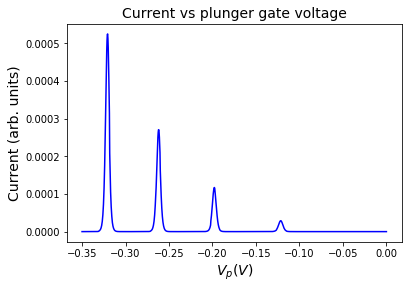

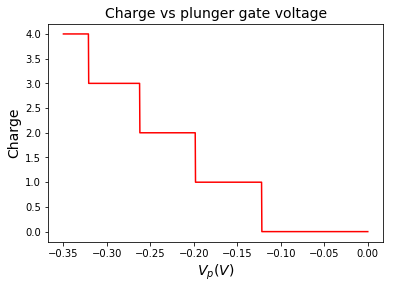

In [28]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]
plt.figure(1)
plt.plot(V_P_vec,current_vec,color='b')
plt.ylabel(r"Current (arb. units)",fontsize=14)
plt.xlabel(r"$V_p (V)$",fontsize=14)

plt.title("Current vs plunger gate voltage",fontsize=14)
plt.savefig("/home/physics43/Desktop/sd_current.png",dpi=300)

plt.figure(2)
plt.plot(V_P_vec,charge_vec,color='r')
plt.ylabel(r"Charge",fontsize=14)
plt.xlabel(r"$V_p (V)$",fontsize=14)
plt.title("Charge vs plunger gate voltage",fontsize=14)
plt.savefig("/home/physics43/Desktop/sd_charge.png",dpi=300)


## Double Dot


In [42]:
import random_double_dot
import imp
imp.reload(random_double_dot)
data_path = "/home/physics43/Sandesh/repos/quantum-ml/Data Generation/Figure Data"

res = random_double_dot.calc_plunger_map(256,data_path)

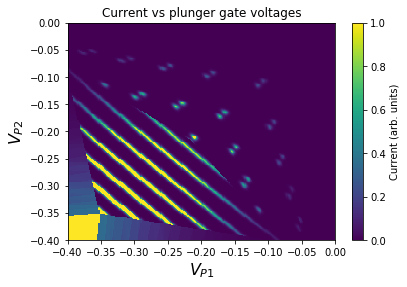

In [53]:
V_P1= np.array(res['V_P1_vec'])
V_P2= np.array(res['V_P2_vec'])
N_v = V_P1.shape[0]
XX,YY = np.meshgrid(V_P1,V_P2)


current_vec = np.array([x['current'] for x in res['output']]).reshape(N_v,N_v)
charge_vec = np.array([np.sum(x['charge']) for x in res['output']]).reshape(N_v,N_v)
state_vec = np.array([x['state'] for x in res['output']]).reshape(N_v,N_v)
sensor_vec = np.array([x['sensor'] for x in res['output']]).reshape(N_v,N_v,-1)

plt.figure(1)
plt.pcolor(XX,YY,1e4*current_vec,vmax=1)
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
cbar = plt.colorbar()
cbar.set_label("Current (arb. units)")
plt.title("Current vs plunger gate voltages")
plt.savefig("/home/physics43/Desktop/dd_current_types.png",dpi=300)


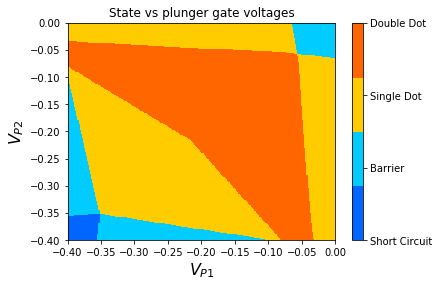

In [54]:
plt.figure(3)
import matplotlib as mpl
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
plt.pcolor(XX,YY,state_vec,cmap=cmap)
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.title("State vs plunger gate voltages")
cbar = plt.colorbar()
cbar.set_ticks([-1,0,1,2])
cbar.set_ticklabels(["Short Circuit","Barrier","Single Dot", "Double Dot"])
plt.savefig("/home/physics43/Desktop/dd_state_types.png",dpi=300)